# This is a Supervised (since we will use the current data for training) Machine Learning Problem which is 'Classification Type'.  Not sure about labels (Score maybe)????.  There are 5 classes i.e. 1,2,3,4,5 (overall score) that each line item needs to get classified into.
Possible Labels are the following :-
overall:1
overall:2
overall:3
overall:4
overall:5
The goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.
The goal is to correctly label 'reviews' and 'ratings' line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.  This is a multiclass multilabel problem with a few possible subclasses??????

Should I convert 'overall' into a categorical variable and use 'get_dummies' method to create separate columns for overall:1,2,3,4,5.

categorize_label = lambda x:x.astype('category')
sample_df[['overall']] = sample_df[['overall']].apply(categorize_label, axis=0)
dummies = pd.get_dummies(sample_df[['overall']],prefix_sep='_')

dummies.head(2)
gives overall_1, overall_2, etc.

Converting 'object' types to other types speeds up code.


# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')
plt.show()

In [ ]:
import pandas as pd
import gzip

In [5]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import gzip

In [6]:
import datetime
import calendar

In [7]:
import numpy as np

In [8]:
from string import punctuation

In [9]:
from __future__ import division

In [10]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

In [11]:
import re

In [12]:
# data visualization
# pip install seaborn
import seaborn as sns

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')

# Start of Data Munging Section

###### Function to GUnzip a File

In [14]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

###### Function to return a Dataframe from a JSON - Gzip file

In [15]:
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

###### Reading the Reviews into DataFrames

In [16]:
df_IV = getDF('reviews_Amazon_Instant_Video_5.json.gz')
df_AA = getDF('reviews_Apps_for_Android_5.json.gz')
df_AU = getDF('reviews_Automotive_5.json.gz')
df_BA = getDF('reviews_Baby_5.json.gz')
df_BE = getDF('reviews_Beauty_5.json.gz')
df_BO = getDF('reviews_Books_5.json.gz')
df_CV = getDF('reviews_CDs_and_Vinyl_5.json.gz')
df_CP = getDF('reviews_Cell_Phones_and_Accessories_5.json.gz')
df_CJ = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')
df_DM = getDF('reviews_Digital_Music_5.json.gz')
df_EL = getDF('reviews_Electronics_5.json.gz')
df_GG = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
df_HP = getDF('reviews_Health_and_Personal_Care_5.json.gz')
df_HK = getDF('reviews_Home_and_Kitchen_5.json.gz')
df_KS = getDF('reviews_Kindle_Store_5.json.gz')
df_MT = getDF('reviews_Movies_and_TV_5.json.gz')
df_MI = getDF('reviews_Musical_Instruments_5.json.gz')
df_OP = getDF('reviews_Office_Products_5.json.gz')
df_LG = getDF('reviews_Patio_Lawn_and_Garden_5.json.gz')
df_PS = getDF('reviews_Pet_Supplies_5.json.gz')
df_SO = getDF('reviews_Sports_and_Outdoors_5.json.gz')
df_TH = getDF('reviews_Tools_and_Home_Improvement_5.json.gz')
df_TG = getDF('reviews_Toys_and_Games_5.json.gz')
df_VG = getDF('reviews_Video_Games_5.json.gz')

###### Adding the Product Type Column to each DataFrame

In [17]:
df_IV['ProductType'] = 'Instant Video'
df_AA['ProductType'] = 'Android Apps'
df_AU['ProductType'] = 'Automotive'
df_BA['ProductType'] = 'Baby'
df_BE['ProductType'] = 'Beauty'
df_BO['ProductType'] = 'Books'
df_CV['ProductType'] = 'CDs_and_Vinyl'
df_CP['ProductType'] = 'Cell_Phones_and_Accessories'
df_CJ['ProductType'] = 'Clothing_Shoes_and_Jewelry'
df_DM['ProductType'] = 'Digital_Music'
df_EL['ProductType'] = 'Electronics'
df_GG['ProductType'] = 'Grocery_and_Gourmet_Food'
df_HP['ProductType'] = 'Health_and_Personal_Care'
df_HK['ProductType'] = 'Home_and_Kitchen'
df_KS['ProductType'] = 'Kindle_Store'
df_MT['ProductType'] = 'Movies_and_TV'
df_MI['ProductType'] = 'Musical_Instruments'
df_OP['ProductType'] = 'Office_Products'
df_LG['ProductType'] = 'Patio_Lawn_and_Garden'
df_PS['ProductType'] = 'Pet_Supplies'
df_SO['ProductType'] = 'Sports_and_Outdoors'
df_TH['ProductType'] = 'Tools_and_Home_Improvement'
df_TG['ProductType'] = 'Toys_and_Games'
df_VG['ProductType'] = 'Video_Games'

###### Adding individual DFs to AmazonReviewsDataFrame List

In [18]:
df_AzReviews =[]
df_AzReviews.append(df_IV)
df_AzReviews.append(df_AA)
df_AzReviews.append(df_AU) 
df_AzReviews.append(df_BA) 
df_AzReviews.append(df_BE) 
df_AzReviews.append(df_BO) 
df_AzReviews.append(df_CV) 
df_AzReviews.append(df_CP) 
df_AzReviews.append(df_CJ) 
df_AzReviews.append(df_DM) 
df_AzReviews.append(df_EL) 
df_AzReviews.append(df_GG)
df_AzReviews.append(df_HP) 
df_AzReviews.append(df_HK) 
df_AzReviews.append(df_KS) 
df_AzReviews.append(df_MT)
df_AzReviews.append(df_MI) 
df_AzReviews.append(df_OP)
df_AzReviews.append(df_LG) 
df_AzReviews.append(df_PS) 
df_AzReviews.append(df_SO)
df_AzReviews.append(df_TH)
df_AzReviews.append(df_TG)
df_AzReviews.append(df_VG)

print(df_AzReviews[0].info())  
print(df_AzReviews[23].info())  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 10 columns):
reviewTime        37126 non-null object
helpful           37126 non-null object
reviewerName      36797 non-null object
summary           37126 non-null object
unixReviewTime    37126 non-null int64
reviewText        37126 non-null object
reviewerID        37126 non-null object
overall           37126 non-null float64
asin              37126 non-null object
ProductType       37126 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 10 columns):
reviewTime        231780 non-null object
helpful           231780 non-null object
reviewerName      228967 non-null object
summary           231780 non-null object
unixReviewTime    231780 non-null int64
reviewText        231780 non-null object
reviewerID        231780 non-null object
overall           231780 no

###### Add Column Names to Ratings Dataframe since it is missing the Header

In [19]:
RatingColumnNames = ['reviewerID','asin','overall','unixReviewTime']

###### Reading the Ratings into DataFrames

In [20]:
df_RT_IV = pd.read_csv('ratings_Amazon_Instant_Video.csv', header=0, names=RatingColumnNames)
df_RT_AA = pd.read_csv('ratings_Apps_for_Android.csv',  header=0, names=RatingColumnNames)
df_RT_AU = pd.read_csv('ratings_Automotive.csv',  header=0, names=RatingColumnNames)
df_RT_BA = pd.read_csv('ratings_Baby.csv', header=0, names=RatingColumnNames)
df_RT_BE = pd.read_csv('ratings_Beauty.csv', header=0, names=RatingColumnNames)
df_RT_BO = pd.read_csv('ratings_Books.csv', header=0, names=RatingColumnNames)
df_RT_CV = pd.read_csv('ratings_CDs_and_Vinyl.csv', header=0, names=RatingColumnNames)
df_RT_CP = pd.read_csv('ratings_Cell_Phones_and_Accessories.csv', header=0, names=RatingColumnNames)
df_RT_CJ = pd.read_csv('ratings_Clothing_Shoes_and_Jewelry.csv', header=0, names=RatingColumnNames)
df_RT_DM = pd.read_csv('ratings_Digital_Music.csv', header=0, names=RatingColumnNames)
df_RT_EL = pd.read_csv('ratings_Electronics.csv', header=0, names=RatingColumnNames)
df_RT_GG = pd.read_csv('ratings_Grocery_and_Gourmet_Food.csv', header=0, names=RatingColumnNames)
df_RT_HP = pd.read_csv('ratings_Health_and_Personal_Care.csv', header=0, names=RatingColumnNames)
df_RT_HK = pd.read_csv('ratings_Home_and_Kitchen.csv', header=0, names=RatingColumnNames)
df_RT_KS = pd.read_csv('ratings_Kindle_Store.csv', header=0, names=RatingColumnNames)
df_RT_MT = pd.read_csv('ratings_Movies_and_TV.csv', header=0, names=RatingColumnNames)
df_RT_MI = pd.read_csv('ratings_Musical_Instruments.csv', header=0, names=RatingColumnNames)
df_RT_OP = pd.read_csv('ratings_Office_Products.csv', header=0, names=RatingColumnNames)
df_RT_LG = pd.read_csv('ratings_Patio_Lawn_and_Garden.csv', header=0, names=RatingColumnNames)
df_RT_PS = pd.read_csv('ratings_Pet_Supplies.csv', header=0, names=RatingColumnNames)
df_RT_SO = pd.read_csv('ratings_Sports_and_Outdoors.csv', header=0, names=RatingColumnNames)
df_RT_TH = pd.read_csv('ratings_Tools_and_Home_Improvement.csv', header=0, names=RatingColumnNames)
df_RT_TG = pd.read_csv('ratings_Toys_and_Games.csv', header=0, names=RatingColumnNames)
df_RT_VG = pd.read_csv('ratings_Video_Games.csv', header=0, names=RatingColumnNames)

###### Adding the Product Type Column to each DataFrame

In [21]:
df_RT_IV['ProductType'] = 'Instant Video'
df_RT_AA['ProductType'] = 'Android Apps'
df_RT_AU['ProductType'] = 'Automotive'
df_RT_BA['ProductType'] = 'Baby'
df_RT_BE['ProductType'] = 'Beauty'
df_RT_BO['ProductType'] = 'Books'
df_RT_CV['ProductType'] = 'CDs_and_Vinyl'
df_RT_CP['ProductType'] = 'Cell_Phones_and_Accessories'
df_RT_CJ['ProductType'] = 'Clothing_Shoes_and_Jewelry'
df_RT_DM['ProductType'] = 'Digital_Music'
df_RT_EL['ProductType'] = 'Electronics'
df_RT_GG['ProductType'] = 'Grocery_and_Gourmet_Food'
df_RT_HP['ProductType'] = 'Health_and_Personal_Care'
df_RT_HK['ProductType'] = 'Home_and_Kitchen'
df_RT_KS['ProductType'] = 'Kindle_Store'
df_RT_MT['ProductType'] = 'Movies_and_TV'
df_RT_MI['ProductType'] = 'Musical_Instruments'
df_RT_OP['ProductType'] = 'Office_Products'
df_RT_LG['ProductType'] = 'Patio_Lawn_and_Garden'
df_RT_PS['ProductType'] = 'Pet_Supplies'
df_RT_SO['ProductType'] = 'Sports_and_Outdoors'
df_RT_TH['ProductType'] = 'Tools_and_Home_Improvement'
df_RT_TG['ProductType'] = 'Toys_and_Games'
df_RT_VG['ProductType'] = 'Video_Games'

###### Adding individual DFs to AmazonRatingsDataFrame List

In [22]:
df_AzRatings =[]
df_AzRatings.append(df_RT_IV)
df_AzRatings.append(df_RT_AA)
df_AzRatings.append(df_RT_AU) 
df_AzRatings.append(df_RT_BA) 
df_AzRatings.append(df_RT_BE) 
df_AzRatings.append(df_RT_BO) 
df_AzRatings.append(df_RT_CV) 
df_AzRatings.append(df_RT_CP) 
df_AzRatings.append(df_RT_CJ) 
df_AzRatings.append(df_RT_DM) 
df_AzRatings.append(df_RT_EL) 
df_AzRatings.append(df_RT_GG)
df_AzRatings.append(df_RT_HP) 
df_AzRatings.append(df_RT_HK) 
df_AzRatings.append(df_RT_KS) 
df_AzRatings.append(df_RT_MT)
df_AzRatings.append(df_RT_MI) 
df_AzRatings.append(df_RT_OP)
df_AzRatings.append(df_RT_LG) 
df_AzRatings.append(df_RT_PS) 
df_AzRatings.append(df_RT_SO)
df_AzRatings.append(df_RT_TH)
df_AzRatings.append(df_RT_TG)
df_AzRatings.append(df_RT_VG)

print(df_AzRatings[0].info())  
print(df_AzRatings[23].info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583932 entries, 0 to 583931
Data columns (total 5 columns):
reviewerID        583932 non-null object
asin              583932 non-null object
overall           583932 non-null float64
unixReviewTime    583932 non-null int64
ProductType       583932 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 22.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324752 entries, 0 to 1324751
Data columns (total 5 columns):
reviewerID        1324752 non-null object
asin              1324752 non-null object
overall           1324752 non-null float64
unixReviewTime    1324752 non-null int64
ProductType       1324752 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 50.5+ MB
None


###### Use Value_counts() to understand how many columns are of type object

In [ ]:
df_AzReviews[23].dtypes.value_counts()

###### Printing Reviews and Ratings Dataframes

In [23]:
print(df_AzReviews[23].head())

    reviewTime  helpful                        reviewerName  \
0   07 9, 2012  [8, 12]                                 123   
1  06 30, 2013   [0, 0]  Alejandro Henao "Electronic Junky"   
2  06 28, 2014   [0, 0]          Amazon Shopper "Mr.Repsol"   
3  09 14, 2011  [7, 10]                            ampgreen   
4  06 14, 2011   [2, 2]        Angry Ryan "Ryan A. Forrest"   

                                           summary  unixReviewTime  \
0         Pay to unlock content? I don't think so.      1341792000   
1                                  Good rally game      1372550400   
2                                        Wrong key      1403913600   
3  awesome game, if it did not crash frequently !!      1315958400   
4                                           DIRT 3      1308009600   

                                          reviewText      reviewerID  overall  \
0  Installing the game was a struggle (because of...  A2HD75EMZR8QLN      1.0   
1  If you like rally cars get this gam

In [24]:
print(df_AzRatings[23].head())

       reviewerID        asin  overall  unixReviewTime  ProductType
0  A24SSUT5CSW8BH  0078764343      5.0      1377302400  Video_Games
1   AK3V0HEBJMQ7J  0078764343      4.0      1372896000  Video_Games
2  A10BECPH7W8HM7  043933702X      5.0      1404950400  Video_Games
3  A2PRV9OULX1TWP  043933702X      5.0      1386115200  Video_Games
4   AE7GUHCDQQ4UI  043933702X      1.0      1366156800  Video_Games


###### Dataframe df_AzReviews[23] and df_AzRatings[23] Before dropna

In [25]:
df_AzReviews[23].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 10 columns):
reviewTime        231780 non-null object
helpful           231780 non-null object
reviewerName      228967 non-null object
summary           231780 non-null object
unixReviewTime    231780 non-null int64
reviewText        231780 non-null object
reviewerID        231780 non-null object
overall           231780 non-null float64
asin              231780 non-null object
ProductType       231780 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 19.5+ MB


In [26]:
df_AzRatings[23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324752 entries, 0 to 1324751
Data columns (total 5 columns):
reviewerID        1324752 non-null object
asin              1324752 non-null object
overall           1324752 non-null float64
unixReviewTime    1324752 non-null int64
ProductType       1324752 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 50.5+ MB


###### Dataframe df_AzReviews[23] and df_AzRatings[23] After dropna - Shows no change for Ratings row numbers

In [27]:
df_AzReviews[23].dropna(how="any",inplace = True)
df_AzReviews[23].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228967 entries, 0 to 231779
Data columns (total 10 columns):
reviewTime        228967 non-null object
helpful           228967 non-null object
reviewerName      228967 non-null object
summary           228967 non-null object
unixReviewTime    228967 non-null int64
reviewText        228967 non-null object
reviewerID        228967 non-null object
overall           228967 non-null float64
asin              228967 non-null object
ProductType       228967 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 19.2+ MB


In [28]:
df_AzRatings[23].dropna(how="any",inplace = True)
df_AzRatings[23].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324752 entries, 0 to 1324751
Data columns (total 5 columns):
reviewerID        1324752 non-null object
asin              1324752 non-null object
overall           1324752 non-null float64
unixReviewTime    1324752 non-null int64
ProductType       1324752 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 60.6+ MB


###### Dataframe df_AzReviews -  running the dropna method on the list of DFs

In [29]:
for i in range(24):
    df_AzReviews[i].dropna(how="any",inplace = True)

###### Dataframe df_AzRatings -  running the dropna method on the list of DFs

In [30]:
for i in range(24):
    df_AzRatings[i].dropna(how="any",inplace = True)

###### Printing Reviews & Rating Dataframe Heads to check data integrity

In [31]:
print(df_AzReviews[0].head())
print(df_AzRatings[0].head())

    reviewTime helpful                    reviewerName  \
0   05 3, 2014  [0, 0]                        AdrianaM   
1   09 3, 2012  [0, 0]                         Carol T   
2  10 16, 2013  [0, 1]  Daniel Cooper "dancoopermedia"   
3  10 30, 2013  [0, 0]                  J. Kaplan "JJ"   
4  02 11, 2009  [1, 1]                   Michael Dobey   

                          summary  unixReviewTime  \
0      A little bit boring for me      1399075200   
1           Excellent Grown Up TV      1346630400   
2           Way too boring for me      1381881600   
3     Robson Green is mesmerizing      1383091200   
4  Robson green and great writing      1234310400   

                                          reviewText      reviewerID  overall  \
0  I had big expectations because I love English ...  A11N155CW1UV02      2.0   
1  I highly recommend this series. It is a must f...  A3BC8O2KCL29V2      5.0   
2  This one is a real snoozer. Don't believe anyt...   A60D5HQFOTSOM      1.0   
3  Myste

###### Printing Reviews & Rating Dataframe Tails to check data integrity

In [32]:
print(df_AzReviews[0].tail())
print(df_AzRatings[0].tail())

        reviewTime   helpful             reviewerName  \
37121  07 19, 2014    [0, 0]                    Mpr90   
37122  07 14, 2014  [13, 15]             Mr. Markster   
37123  07 14, 2014    [0, 2]      Rating My Best Pick   
37124  07 14, 2014    [1, 1]  Sherry "trying in ohio"   
37125  07 16, 2014    [3, 4]     Victoria J. Dennison   

                                                 summary  unixReviewTime  \
37121                                      Great Series!      1405728000   
37122  Forget the Vampire Diaries -- This is a REAL V...      1405296000   
37123  It's only the first episode so I'm not real su...      1405296000   
37124  and that is good. The accents are a bit much h...      1405296000   
37125                  I may have paid towatch the pilot      1405468800   

                                              reviewText      reviewerID  \
37121  I love the books! The show is amazing so far. ...  A1ELO9LMSE1CQ7   
37122  "The Strain" has potential to be an excel

# End of Data Munging Section

# Start of Working on Entire Dataset for adding Data Features/Columns and cleanup Section

###### Setting the index for both dataFrame Lists i.e. Reviews and Ratings as 'reviewerID'

In [33]:
for i in range(24):
    df_AzReviews[i].set_index(df_AzReviews[i]['reviewerID'],inplace=True)
    print(df_AzReviews[i].index)

Index(['A11N155CW1UV02', 'A3BC8O2KCL29V2', 'A60D5HQFOTSOM', 'A1RJPIGRSNX4PW',
       'A16XRPF40679KG', 'A1POFVVXUZR3IQ', 'A1PG2VV4W1WRPL', 'ATASGS8HZHGIB',
       'A3RXD7Z44T9DHW', 'AUX8EUBNTHIIU',
       ...
       'AW3VZ5O895LRK', 'A3DN9249F3X716', 'ACBMCM7S32FZX', 'A2HVL790PBWYTU',
       'A2EKSOLTKBGWTK', 'A1ELO9LMSE1CQ7', 'AGOEKVIJV9UX6', 'A3I291BE0RNZCU',
       'A1MNITZRYU71IO', 'A1XMHK9HN5MW2H'],
      dtype='object', name='reviewerID', length=36797)
Index(['A1N4O8VOJZTDVB', 'A2HQWU6HUKIEC7', 'A1SXASF6GYG96I', 'A2B54P9ZDYH167',
       'AFOFZDTX5UC6D', 'A331GYAT4ESYI3', 'A2YEHF8T823TDC', 'A3699WHISXX94Z',
       'A2BXV49EIES2TB', 'A37HM5TMCMHJES',
       ...
       'A1WNAM9WK4JPI1', 'A6JZLY7ZPNTFZ', 'A329Z71KVWP44F', 'AVTWEYS77ITQ5',
       'A2LAC8Z59WDLP2', 'AZJ11YS0E52AI', 'A2550XGZEFDH2Y', 'A1KNDB16TG5QXD',
       'A1IHFHA5LI9SGI', 'A3GVFRVK9RYGTV'],
      dtype='object', name='reviewerID', length=694739)
Index(['A3F73SC1LY51OO', 'A20S66SKYXULG2', 'A2I8LFSN2IS5EO', 'A3GT2EWQS

In [34]:
for i in range(24):
    df_AzRatings[i].set_index(df_AzRatings[i]['reviewerID'],inplace=True)
    print(df_AzRatings[i].index)

Index(['AGZ8SM1BGK3CK', 'A2VHZ21245KBT7', 'ACX8YW2D5EGP6', 'A9RNMO9MUSMTJ',
       'A3STFVPM8NHJ7B', 'A2582KMXLK2P06', 'A1TZCLCW9QGGBH', 'A2E2I6B878CRMA',
       'AD5MZA8SOVMPJ', 'A3IE1M3QVUKIJN',
       ...
       'A3U3RFL0XE4F7V', 'AOK8AARD069GP', 'A1IWX2XBFTCMSR', 'A37IYQC8EKLDYJ',
       'AJE4MXRQ5W9JU', 'A9MBSKL8LTFN9', 'A3U3RFL0XE4F7V', 'AEO407GROR6JB',
       'A2YXWWVABHWIXN', 'ANZJEQZRYUCBC'],
      dtype='object', name='reviewerID', length=583932)
Index(['A1ZUSQ3TC3EC4C', 'AC05OAXD72X1V', 'A2RVMFOKBVM21I', 'A3NBSRGUWQGCMZ',
       'A2KTVCVZJ8GPD2', 'A2I9RREBHMMPCJ', 'A1N4O8VOJZTDVB', 'A2HQWU6HUKIEC7',
       'A1SXASF6GYG96I', 'A2B54P9ZDYH167',
       ...
       'A2CYMBX44ICBMD', 'A15CK6OV006IWW', 'A1GNY9105V63S4', 'A3AY7CSC53ULU6',
       'A15U4R5HB5QE2M', 'A1WKBCDSH3AORB', 'A1WKBCDSH3AORB', 'AO7VN21R9P2MM',
       'A3I9KEWNIJKOT0', 'A27OTO46BZUF83'],
      dtype='object', name='reviewerID', length=2638171)
Index(['A1QBLUSZW281TA', 'A3B40ZIZJ3HEP7', 'A1DUAXYX5WHSX1', 'A1VS7YWE

In [35]:
df_AzReviews[23]

,reviewTime,helpful,reviewerName,summary,unixReviewTime,reviewText,reviewerID,overall,asin,ProductType
reviewerID,,,,,,,,,,
A2HD75EMZR8QLN,"07 9, 2012","[8, 12]",123,Pay to unlock content? I don't think so.,1341792000,Installing the game was a struggle (because of...,A2HD75EMZR8QLN,1.0,0700099867,Video_Games
A3UR8NLLY1ZHCX,"06 30, 2013","[0, 0]","Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,If you like rally cars get this game you will ...,A3UR8NLLY1ZHCX,4.0,0700099867,Video_Games
A1INA0F5CWW3J4,"06 28, 2014","[0, 0]","Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,1st shipment received a book instead of the ga...,A1INA0F5CWW3J4,1.0,0700099867,Video_Games
A1DLMTOTHQ4AST,"09 14, 2011","[7, 10]",ampgreen,"awesome game, if it did not crash frequently !!",1315958400,"I got this version instead of the PS3 version,...",A1DLMTOTHQ4AST,3.0,0700099867,Video_Games
A361M14PU2GUEG,"06 14, 2011","[2, 2]","Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,I had Dirt 2 on Xbox 360 and it was an okay ga...,A361M14PU2GUEG,4.0,0700099867,Video_Games
A2UTRVO4FDCBH6,"05 11, 2013","[0, 0]",A.R.G.,"Good racing game, terrible Windows Live Requir...",1368230400,"Overall this is a well done racing game, with ...",A2UTRVO4FDCBH6,4.0,0700099867,Video_Games
AN3YYDZAS3O1Y,"08 14, 2011","[11, 13]",Bob,A step up from Dirt 2 and that is terrific!,1313280000,Loved playing Dirt 2 and I thought the graphic...,AN3YYDZAS3O1Y,5.0,0700099867,Video_Games
AQTC623NCESZW,"11 24, 2012","[1, 4]",Chesty Puller,Crash 3 is correct name AKA Microsoft,1353715200,I can't tell you what a piece of dog**** this ...,AQTC623NCESZW,1.0,0700099867,Video_Games
A1QJJU33VNC4S7,"11 14, 2012","[0, 1]",D@rkFX,A great game ruined by Microsoft's account man...,1352851200,I initially gave this one star because it was ...,A1QJJU33VNC4S7,4.0,0700099867,Video_Games


In [36]:
df_AzRatings[23]

,reviewerID,asin,overall,unixReviewTime,ProductType
reviewerID,,,,,
A24SSUT5CSW8BH,A24SSUT5CSW8BH,0078764343,5.0,1377302400,Video_Games
AK3V0HEBJMQ7J,AK3V0HEBJMQ7J,0078764343,4.0,1372896000,Video_Games
A10BECPH7W8HM7,A10BECPH7W8HM7,043933702X,5.0,1404950400,Video_Games
A2PRV9OULX1TWP,A2PRV9OULX1TWP,043933702X,5.0,1386115200,Video_Games
AE7GUHCDQQ4UI,AE7GUHCDQQ4UI,043933702X,1.0,1366156800,Video_Games
A48ABFDDRMKI8,A48ABFDDRMKI8,043933702X,5.0,1374192000,Video_Games
A26B0P6K95SIKW,A26B0P6K95SIKW,0439339960,3.0,1288569600,Video_Games
AZ3UWOC8QSO6C,AZ3UWOC8QSO6C,0439339987,5.0,1366848000,Video_Games
A182S3ANC0W7DL,A182S3ANC0W7DL,0439342260,4.0,1355875200,Video_Games


# Feature Engineering

###### Adding reviewertext features such as character_count and word_count to the Reviews dataframe list

In [37]:
def calculate_charcount(row):
    return len(row['reviewText'])

In [38]:
for i in range(24):
    subset = (df_AzReviews[i]['reviewText'].notnull())
    suspect = pd.DataFrame()
    suspect = df_AzReviews[i][subset]
    
    df_AzReviews[i]['charcount_reviewtext'] = suspect.apply(calculate_charcount,axis=1)
#   print(df_AzReviews[i]) 

In [39]:
def calculate_wordcount(row):
    return len(row['reviewText'].split())

In [40]:
for i in range(24):
    subset = (df_AzReviews[i]['reviewText'].notnull())
    suspect = pd.DataFrame()
    suspect = df_AzReviews[i][subset]
    
    df_AzReviews[i]['wordcount_reviewtext'] = suspect.apply(calculate_wordcount,axis=1)
#   print(df_AzReviews[i])  

In [41]:
df_AzReviews[16]

,reviewTime,helpful,reviewerName,summary,unixReviewTime,reviewText,reviewerID,overall,asin,ProductType,charcount_reviewtext,wordcount_reviewtext
reviewerID,,,,,,,,,,,,
A2IBPI20UZIR0U,"02 28, 2014","[0, 0]","cassandra tu ""Yeah, well, that's just like, u...",good,1393545600,"Not much to write about here, but it does exac...",A2IBPI20UZIR0U,5.0,1384719342,Musical_Instruments,268,51
A14VAT5EAX3D9S,"03 16, 2013","[13, 14]",Jake,Jake,1363392000,The product does exactly as it should and is q...,A14VAT5EAX3D9S,5.0,1384719342,Musical_Instruments,544,104
A195EZSQDW3E21,"08 28, 2013","[1, 1]","Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000,The primary job of this device is to block the...,A195EZSQDW3E21,5.0,1384719342,Musical_Instruments,436,77
A2C00NNG1ZQQG2,"02 14, 2014","[0, 0]","RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000,Nice windscreen protects my MXL mic and preven...,A2C00NNG1ZQQG2,5.0,1384719342,Musical_Instruments,206,35
A94QU4C90B1AX,"02 21, 2014","[0, 0]",SEAN MASLANKA,No more pops when I record my vocals.,1392940800,This pop filter is great. It looks and perform...,A94QU4C90B1AX,5.0,1384719342,Musical_Instruments,159,28
A2A039TZMZHH9Y,"12 21, 2012","[0, 0]","Bill Lewey ""blewey""",The Best Cable,1356048000,So good that I bought another one. Love the h...,A2A039TZMZHH9Y,5.0,B00004Y2UT,Musical_Instruments,234,42
A1UPZM995ZAH90,"01 19, 2014","[0, 0]",Brian,Monster Standard 100 - 21' Instrument Cable,1390089600,"I have used monster cables for years, and with...",A1UPZM995ZAH90,5.0,B00004Y2UT,Musical_Instruments,191,35
AJNFQI3YR6XJ5,"11 16, 2012","[0, 0]","Fender Guy ""Rick""",Didn't fit my 1996 Fender Strat...,1353024000,I now use this cable to run from the output of...,AJNFQI3YR6XJ5,3.0,B00004Y2UT,Musical_Instruments,845,167
A3M1PLEYNDEYO8,"07 6, 2008","[0, 0]","G. Thomas ""Tom""",Great cable,1215302400,Perfect for my Epiphone Sheraton II. Monster ...,A3M1PLEYNDEYO8,5.0,B00004Y2UT,Musical_Instruments,201,36


###### Adding helpful column features such as helpful_numerator, helpful_denominator and helpful_percentage to the Reviews dataframe list

In [42]:
for i in range(24):
    df_AzReviews[i]['helpful_numerator'] = [helpful_Numbers[0] for helpful_Numbers in df_AzReviews[i]['helpful']]
    df_AzReviews[i]['helpful_denominator'] = [helpful_Numbers[1] for helpful_Numbers in df_AzReviews[i]['helpful']]
    df_AzReviews[i]['helpfulpercentage'] = [(np.divide(helpful_Numbers[0],helpful_Numbers[1])* 100) for helpful_Numbers in df_AzReviews[i]['helpful']]

In [43]:
df_AzReviews[0]

,reviewTime,helpful,reviewerName,summary,unixReviewTime,reviewText,reviewerID,overall,asin,ProductType,charcount_reviewtext,wordcount_reviewtext,helpful_numerator,helpful_denominator,helpfulpercentage
reviewerID,,,,,,,,,,,,,,,
A11N155CW1UV02,"05 3, 2014","[0, 0]",AdrianaM,A little bit boring for me,1399075200,I had big expectations because I love English ...,A11N155CW1UV02,2.0,B000H00VBQ,Instant Video,159,28,0,0,NaN
A3BC8O2KCL29V2,"09 3, 2012","[0, 0]",Carol T,Excellent Grown Up TV,1346630400,I highly recommend this series. It is a must f...,A3BC8O2KCL29V2,5.0,B000H00VBQ,Instant Video,186,32,0,0,NaN
A60D5HQFOTSOM,"10 16, 2013","[0, 1]","Daniel Cooper ""dancoopermedia""",Way too boring for me,1381881600,This one is a real snoozer. Don't believe anyt...,A60D5HQFOTSOM,1.0,B000H00VBQ,Instant Video,134,26,0,1,0.000000
A1RJPIGRSNX4PW,"10 30, 2013","[0, 0]","J. Kaplan ""JJ""",Robson Green is mesmerizing,1383091200,Mysteries are interesting. The tension betwee...,A1RJPIGRSNX4PW,4.0,B000H00VBQ,Instant Video,141,21,0,0,NaN
A16XRPF40679KG,"02 11, 2009","[1, 1]",Michael Dobey,Robson green and great writing,1234310400,"This show always is excellent, as far as briti...",A16XRPF40679KG,5.0,B000H00VBQ,Instant Video,1300,246,1,1,100.000000
A1POFVVXUZR3IQ,"10 11, 2011","[12, 12]",Z Hayes,I purchased the series via streaming and loved...,1318291200,I discovered this series quite by accident. Ha...,A1POFVVXUZR3IQ,5.0,B000H00VBQ,Instant Video,3039,506,12,12,100.000000
A1PG2VV4W1WRPL,"10 15, 2013","[0, 0]","Jimmy C. Saunders ""Papa Smurf""",It takes up your time.,1381795200,"It beats watching a blank screen. However, I j...",A1PG2VV4W1WRPL,3.0,B000H0X79O,Instant Video,99,20,0,0,NaN
ATASGS8HZHGIB,"12 29, 2013","[0, 0]",JohnnyC,A reasonable way to kill a few minutes,1388275200,"There are many episodes in this series, so I p...",ATASGS8HZHGIB,3.0,B000H0X79O,Instant Video,348,65,0,0,NaN
A3RXD7Z44T9DHW,"02 26, 2014","[0, 0]",Kansas,kansas001,1393372800,This is the best of the best comedy Stand-up. ...,A3RXD7Z44T9DHW,5.0,B000H0X79O,Instant Video,186,37,0,0,NaN


###### Adding time series features such as reviewYear, reviewMonth, reviewDate and reviewDayofWeek to the Reviews and Ratings DataFrame lists

In [44]:
for i in range(24):
    df_AzReviews[i]['ReviewYear'] = [datetime.datetime.utcfromtimestamp(reviewtime).year for reviewtime in df_AzReviews[i]['unixReviewTime']]
    df_AzReviews[i]['ReviewMonth'] = [datetime.datetime.utcfromtimestamp(reviewtime).month for reviewtime in df_AzReviews[i]['unixReviewTime']]
    df_AzReviews[i]['ReviewDate'] = [datetime.datetime.utcfromtimestamp(reviewtime).day for reviewtime in df_AzReviews[i]['unixReviewTime']]
    df_AzReviews[i]['ReviewDayofWeek'] = [datetime.datetime.utcfromtimestamp(reviewtime).weekday() for reviewtime in df_AzReviews[i]['unixReviewTime']]

In [45]:
df_AzReviews[23]

,reviewTime,helpful,reviewerName,summary,unixReviewTime,reviewText,reviewerID,overall,asin,ProductType,charcount_reviewtext,wordcount_reviewtext,helpful_numerator,helpful_denominator,helpfulpercentage,ReviewYear,ReviewMonth,ReviewDate,ReviewDayofWeek
reviewerID,,,,,,,,,,,,,,,,,,,
A2HD75EMZR8QLN,"07 9, 2012","[8, 12]",123,Pay to unlock content? I don't think so.,1341792000,Installing the game was a struggle (because of...,A2HD75EMZR8QLN,1.0,0700099867,Video_Games,779,118,8,12,66.666667,2012,7,9,0
A3UR8NLLY1ZHCX,"06 30, 2013","[0, 0]","Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,If you like rally cars get this game you will ...,A3UR8NLLY1ZHCX,4.0,0700099867,Video_Games,304,53,0,0,NaN,2013,6,30,6
A1INA0F5CWW3J4,"06 28, 2014","[0, 0]","Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,1st shipment received a book instead of the ga...,A1INA0F5CWW3J4,1.0,0700099867,Video_Games,282,53,0,0,NaN,2014,6,28,5
A1DLMTOTHQ4AST,"09 14, 2011","[7, 10]",ampgreen,"awesome game, if it did not crash frequently !!",1315958400,"I got this version instead of the PS3 version,...",A1DLMTOTHQ4AST,3.0,0700099867,Video_Games,3489,646,7,10,70.000000,2011,9,14,2
A361M14PU2GUEG,"06 14, 2011","[2, 2]","Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,I had Dirt 2 on Xbox 360 and it was an okay ga...,A361M14PU2GUEG,4.0,0700099867,Video_Games,294,62,2,2,100.000000,2011,6,14,1
A2UTRVO4FDCBH6,"05 11, 2013","[0, 0]",A.R.G.,"Good racing game, terrible Windows Live Requir...",1368230400,"Overall this is a well done racing game, with ...",A2UTRVO4FDCBH6,4.0,0700099867,Video_Games,715,136,0,0,NaN,2013,5,11,5
AN3YYDZAS3O1Y,"08 14, 2011","[11, 13]",Bob,A step up from Dirt 2 and that is terrific!,1313280000,Loved playing Dirt 2 and I thought the graphic...,AN3YYDZAS3O1Y,5.0,0700099867,Video_Games,431,81,11,13,84.615385,2011,8,14,6
AQTC623NCESZW,"11 24, 2012","[1, 4]",Chesty Puller,Crash 3 is correct name AKA Microsoft,1353715200,I can't tell you what a piece of dog**** this ...,AQTC623NCESZW,1.0,0700099867,Video_Games,728,139,1,4,25.000000,2012,11,24,5
A1QJJU33VNC4S7,"11 14, 2012","[0, 1]",D@rkFX,A great game ruined by Microsoft's account man...,1352851200,I initially gave this one star because it was ...,A1QJJU33VNC4S7,4.0,0700099867,Video_Games,425,77,0,1,0.000000,2012,11,14,2


In [46]:
for i in range(24):
    df_AzRatings[i]['ReviewYear'] = [datetime.datetime.utcfromtimestamp(reviewtime).year for reviewtime in df_AzRatings[i]['unixReviewTime']]
    df_AzRatings[i]['ReviewMonth'] = [datetime.datetime.utcfromtimestamp(reviewtime).month for reviewtime in df_AzRatings[i]['unixReviewTime']]
    df_AzRatings[i]['ReviewDate'] = [datetime.datetime.utcfromtimestamp(reviewtime).day for reviewtime in df_AzRatings[i]['unixReviewTime']]
    df_AzRatings[i]['ReviewDayofWeek'] = [datetime.datetime.utcfromtimestamp(reviewtime).weekday() for reviewtime in df_AzRatings[i]['unixReviewTime']]

In [47]:
df_AzRatings[23]

,reviewerID,asin,overall,unixReviewTime,ProductType,ReviewYear,ReviewMonth,ReviewDate,ReviewDayofWeek
reviewerID,,,,,,,,,
A24SSUT5CSW8BH,A24SSUT5CSW8BH,0078764343,5.0,1377302400,Video_Games,2013,8,24,5
AK3V0HEBJMQ7J,AK3V0HEBJMQ7J,0078764343,4.0,1372896000,Video_Games,2013,7,4,3
A10BECPH7W8HM7,A10BECPH7W8HM7,043933702X,5.0,1404950400,Video_Games,2014,7,10,3
A2PRV9OULX1TWP,A2PRV9OULX1TWP,043933702X,5.0,1386115200,Video_Games,2013,12,4,2
AE7GUHCDQQ4UI,AE7GUHCDQQ4UI,043933702X,1.0,1366156800,Video_Games,2013,4,17,2
A48ABFDDRMKI8,A48ABFDDRMKI8,043933702X,5.0,1374192000,Video_Games,2013,7,19,4
A26B0P6K95SIKW,A26B0P6K95SIKW,0439339960,3.0,1288569600,Video_Games,2010,11,1,0
AZ3UWOC8QSO6C,AZ3UWOC8QSO6C,0439339987,5.0,1366848000,Video_Games,2013,4,25,3
A182S3ANC0W7DL,A182S3ANC0W7DL,0439342260,4.0,1355875200,Video_Games,2012,12,19,2


# End of Working on Entire Dataset for adding Data Features/Columns and cleanup Section

# Start of Data Visualization Section on Entire DataSet

In [48]:
df_AzReviews[0].columns

Index(['reviewTime', 'helpful', 'reviewerName', 'summary', 'unixReviewTime',
       'reviewText', 'reviewerID', 'overall', 'asin', 'ProductType',
       'charcount_reviewtext', 'wordcount_reviewtext', 'helpful_numerator',
       'helpful_denominator', 'helpfulpercentage', 'ReviewYear', 'ReviewMonth',
       'ReviewDate', 'ReviewDayofWeek'],
      dtype='object')

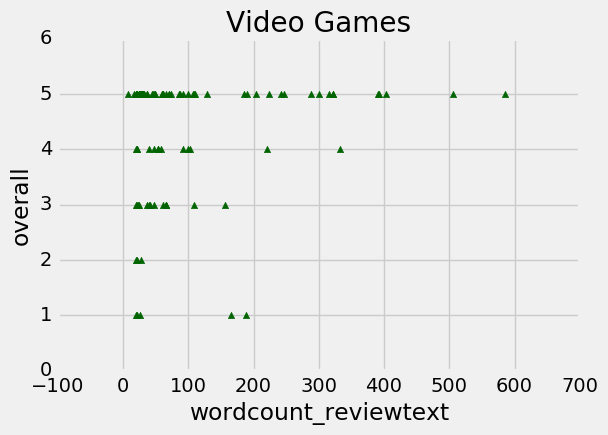

In [50]:
fig, ax = plt.subplots()
ax.scatter(df_AzReviews[0].head(100)['wordcount_reviewtext'], df_AzReviews[0].head(100)['overall'].dropna(), color = 'darkgreen', marker='^')
_ = plt.title('Video Games')
# Label the axes
_ = plt.xlabel('wordcount_reviewtext')
_ = plt.ylabel('overall')
plt.show()

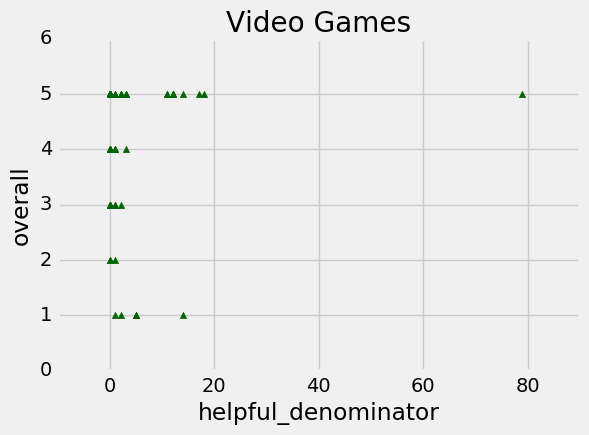

In [51]:
fig, ax = plt.subplots()
ax.scatter( df_AzReviews[0].head(100)['helpful_denominator'].dropna(), df_AzReviews[0].head(100)['overall'].dropna(), color = 'darkgreen', marker='^')
_ = plt.title('Video Games')
# Label the axes
_ = plt.xlabel('helpful_denominator')
_ = plt.ylabel('overall')
plt.show()

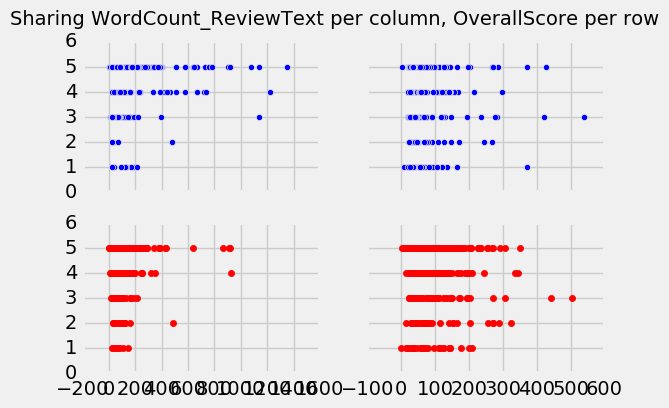

In [53]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# , ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12
# ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24
f.suptitle('Sharing WordCount_ReviewText per column, OverallScore per row')
ax1.scatter(df_AzReviews[0].head(500)['wordcount_reviewtext'], df_AzReviews[0].head(500)['overall'])
ax2.scatter(df_AzReviews[1].head(500)['wordcount_reviewtext'], df_AzReviews[1].head(500)['overall'])
ax3.scatter(df_AzReviews[2].head(500)['wordcount_reviewtext'], df_AzReviews[2].head(500)['overall'], color='r')
ax4.scatter(df_AzReviews[3].head(500)['wordcount_reviewtext'], df_AzReviews[3].head(500)['overall'], color='r')
# ax5.scatter(df_AzReviews[4]['wordcount_reviewtext'], df_AzReviews[4]['overall'])
# ax6.scatter(df_AzReviews[5]['wordcount_reviewtext'], df_AzReviews[5]['overall'])
# ax7.scatter(df_AzReviews[6]['wordcount_reviewtext'], df_AzReviews[6]['overall'], color='r')
# ax8.scatter(df_AzReviews[7]['wordcount_reviewtext'], df_AzReviews[7]['overall'], color='r')
# ax9.scatter(df_AzReviews[8]['wordcount_reviewtext'], df_AzReviews[8]['overall'])
# ax10.scatter(df_AzReviews[9]['wordcount_reviewtext'], df_AzReviews[9]['overall'])
# ax11.scatter(df_AzReviews[10]['wordcount_reviewtext'], df_AzReviews[10]['overall'], color='r')
# ax12.scatter(df_AzReviews[11]['wordcount_reviewtext'], df_AzReviews[11]['overall'], color='r')
# ax13.scatter(df_AzReviews[12]['wordcount_reviewtext'], df_AzReviews[12]['overall'])
# ax14.scatter(df_AzReviews[13]['wordcount_reviewtext'], df_AzReviews[13]['overall'])
# ax15.scatter(df_AzReviews[14]['wordcount_reviewtext'], df_AzReviews[14]['overall'], color='r')
# ax16.scatter(df_AzReviews[15]['wordcount_reviewtext'], df_AzReviews[15]['overall'], color='r')
# ax17.scatter(df_AzReviews[16]['wordcount_reviewtext'], df_AzReviews[16]['overall'])
# ax18.scatter(df_AzReviews[17]['wordcount_reviewtext'], df_AzReviews[17]['overall'])
# ax19.scatter(df_AzReviews[18]['wordcount_reviewtext'], df_AzReviews[18]['overall'], color='r')
# ax20.scatter(df_AzReviews[19]['wordcount_reviewtext'], df_AzReviews[19]['overall'], color='r')
# ax21.scatter(df_AzReviews[20]['wordcount_reviewtext'], df_AzReviews[20]['overall'])
# ax22.scatter(df_AzReviews[21]['wordcount_reviewtext'], df_AzReviews[21]['overall'])
# ax23.scatter(df_AzReviews[22]['wordcount_reviewtext'], df_AzReviews[22]['overall'], color='r')
# ax24.scatter(df_AzReviews[23]['wordcount_reviewtext'], df_AzReviews[23]['overall'], color='r')

In [50]:
# import numpy as np
# import seaborn as sns
# # import matplotlib.pyplot as plt
# sns.set(style="darkgrid")

# mdfh = sns.load_dataset("df_AzReviews[0]")
# g = sns.FacetGrid(mdfh, row="ReviewYear", col="overall", margin_titles=True)
# bins = np.linspace(0, 60, 13)


# n_data = len(df_AzReviews[0]['overall'])
# n_bins = int(np.sqrt(n_data))
# # print(n_bins)

# _ = plt.hist(df_AzReviews[0]['overall'])
# _ = plt.title('Video Games overall score counts')
# _ = plt.xlabel('overall score')
# _ = plt.ylabel('count')

# # plt.show()
# g.map(plt.hist, "overall", color="steelblue", bins=bins, lw=0)

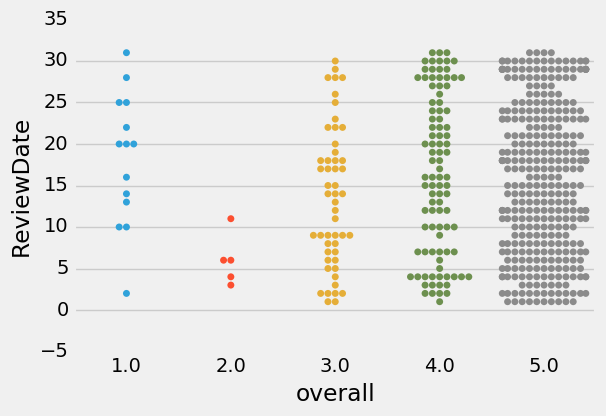

In [54]:
_ = sns.swarmplot(x='overall', y='ReviewDate', data=df_AzReviews[0].head(500))
_ = plt.xlabel('overall')
_ = plt.ylabel('ReviewDate')
plt.show()

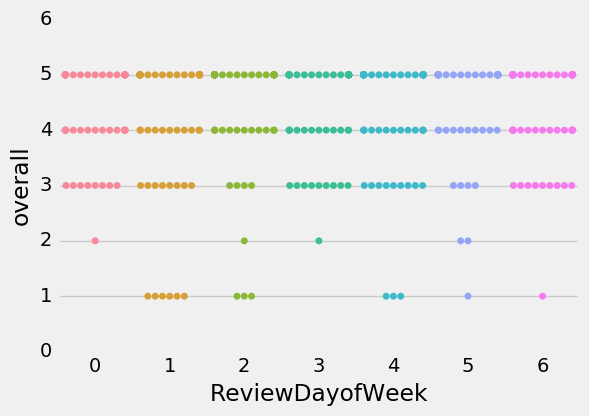

In [55]:
_ = sns.swarmplot(x='ReviewDayofWeek', y='overall', data=df_AzReviews[0].head(500))
_ = plt.xlabel('ReviewDayofWeek')
_ = plt.ylabel('overall')
plt.show()

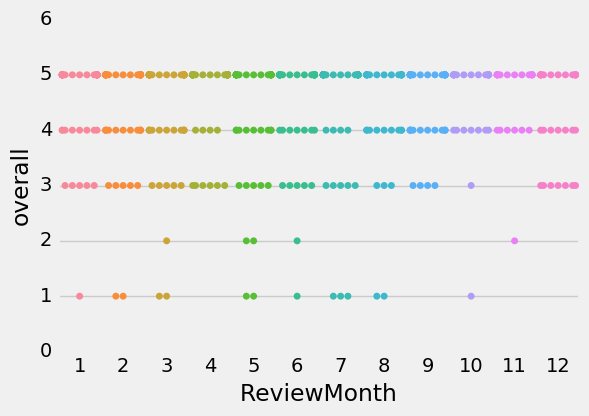

In [56]:
_ = sns.swarmplot(x='ReviewMonth', y='overall', data=df_AzReviews[0].head(500))
_ = plt.xlabel('ReviewMonth')
_ = plt.ylabel('overall')
plt.show()

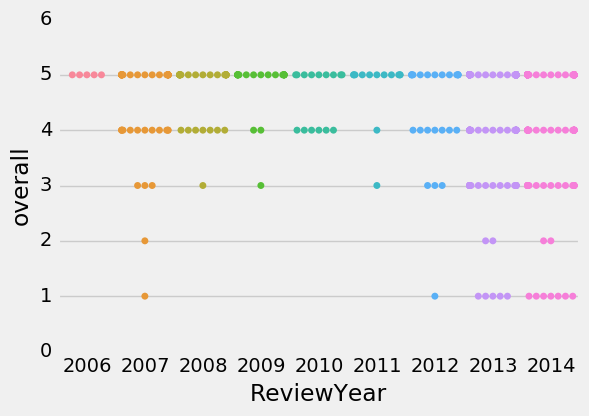

In [57]:
_ = sns.swarmplot(x='ReviewYear', y='overall', data=df_AzReviews[0].head(500))
_ = plt.xlabel('ReviewYear')
_ = plt.ylabel('overall')
plt.show()

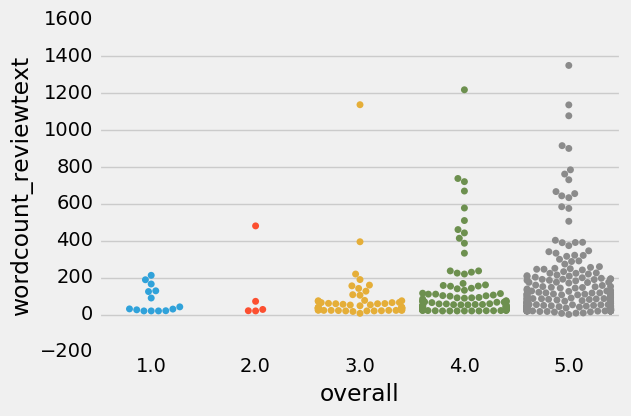

In [58]:
_ = sns.swarmplot(x='overall', y='wordcount_reviewtext', data=df_AzReviews[0].head(500))
_ = plt.xlabel('overall')
_ = plt.ylabel('wordcount_reviewtext')
plt.show()

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x

    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

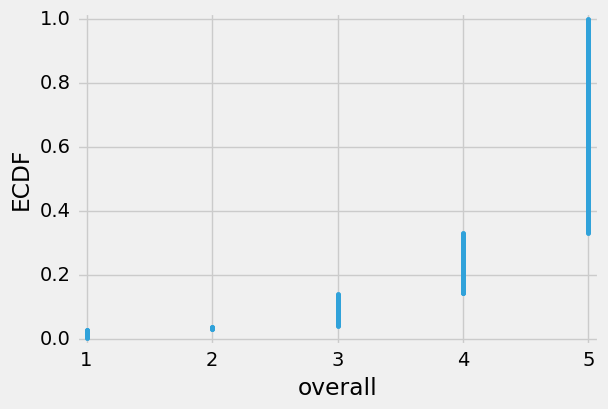

In [59]:
# Compute ECDF for overall score: x_overall, y_overall
x_overall, y_overall = ecdf(df_AzReviews[0].head(500)['overall'])

# Generate plot
_ = plt.plot(x_overall, y_overall, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('overall')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [60]:
df_AzReviews[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36797 entries, A11N155CW1UV02 to A1XMHK9HN5MW2H
Data columns (total 19 columns):
reviewTime              36797 non-null object
helpful                 36797 non-null object
reviewerName            36797 non-null object
summary                 36797 non-null object
unixReviewTime          36797 non-null int64
reviewText              36797 non-null object
reviewerID              36797 non-null object
overall                 36797 non-null float64
asin                    36797 non-null object
ProductType             36797 non-null object
charcount_reviewtext    36797 non-null int64
wordcount_reviewtext    36797 non-null int64
helpful_numerator       36797 non-null int64
helpful_denominator     36797 non-null int64
helpfulpercentage       13031 non-null float64
ReviewYear              36797 non-null int64
ReviewMonth             36797 non-null int64
ReviewDate              36797 non-null int64
ReviewDayofWeek         36797 non-null int64
dtypes:

In [61]:
score_data = df_AzReviews[0].dropna().iloc[:,[7,10,11,12,13,14,15,16,17,18]]
score_data.reset_index(drop=True, inplace=True)
score_data

,overall,charcount_reviewtext,wordcount_reviewtext,helpful_numerator,helpful_denominator,helpfulpercentage,ReviewYear,ReviewMonth,ReviewDate,ReviewDayofWeek
0,1.0,134,26,0,1,0.000000,2013,10,16,2
1,5.0,1300,246,1,1,100.000000,2009,2,11,2
2,5.0,3039,506,12,12,100.000000,2011,10,11,1
3,3.0,112,23,0,1,0.000000,2013,9,5,3
4,3.0,543,108,1,2,50.000000,2014,3,22,5
5,1.0,1163,189,5,14,35.714286,2013,7,31,2
6,1.0,114,21,0,5,0.000000,2014,5,2,4
7,1.0,95,20,0,5,0.000000,2014,3,22,5
8,3.0,396,65,0,1,0.000000,2013,6,17,0
9,5.0,1139,190,72,79,91.139241,2007,7,29,6


In [92]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13031 entries, 0 to 13030
Data columns (total 10 columns):
overall                 13031 non-null float64
charcount_reviewtext    13031 non-null int64
wordcount_reviewtext    13031 non-null int64
helpful_numerator       13031 non-null int64
helpful_denominator     13031 non-null int64
helpfulpercentage       13031 non-null float64
ReviewYear              13031 non-null int64
ReviewMonth             13031 non-null int64
ReviewDate              13031 non-null int64
ReviewDayofWeek         13031 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1018.1 KB


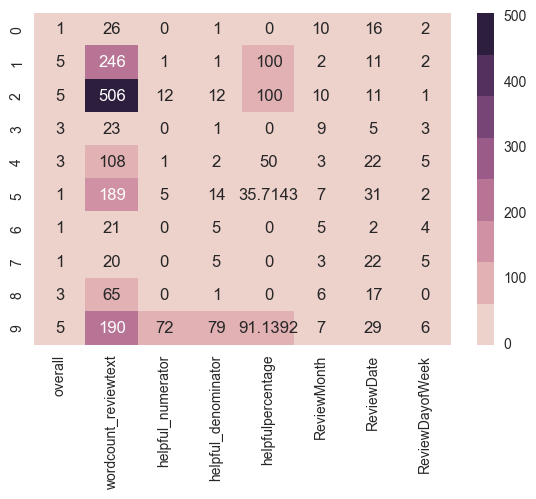

In [122]:
#sns.set_palette("husl")
#sns.cubehelix_palette(8)
new_df = score_data.drop(['charcount_reviewtext','ReviewYear'], axis=1)
ax = sns.heatmap(new_df.head(10),annot=True, fmt="g", cmap=sns.cubehelix_palette(8))

In [126]:
newdata = score_data.pivot("overall","helpful_numerator")
ax = sns.heatmap(newdata,annot=True, fmt="g", cmap='YlGnBu')

IndexError: indices are out-of-bounds

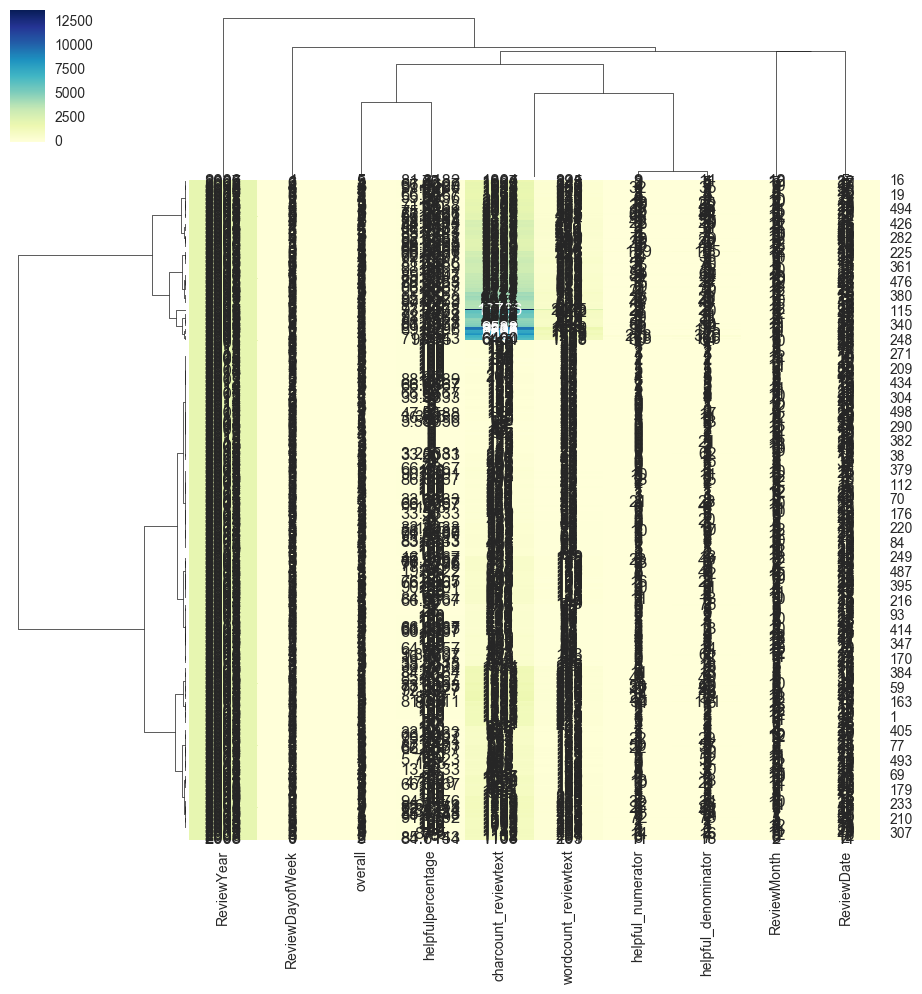

In [68]:
sns.set(color_codes=True)
#iris = sns.load_dataset("score_data")
#species = iris.pop("overall")
g = sns.clustermap(score_data.head(500),metric="correlation",annot=True, fmt="g", cmap='YlGnBu')

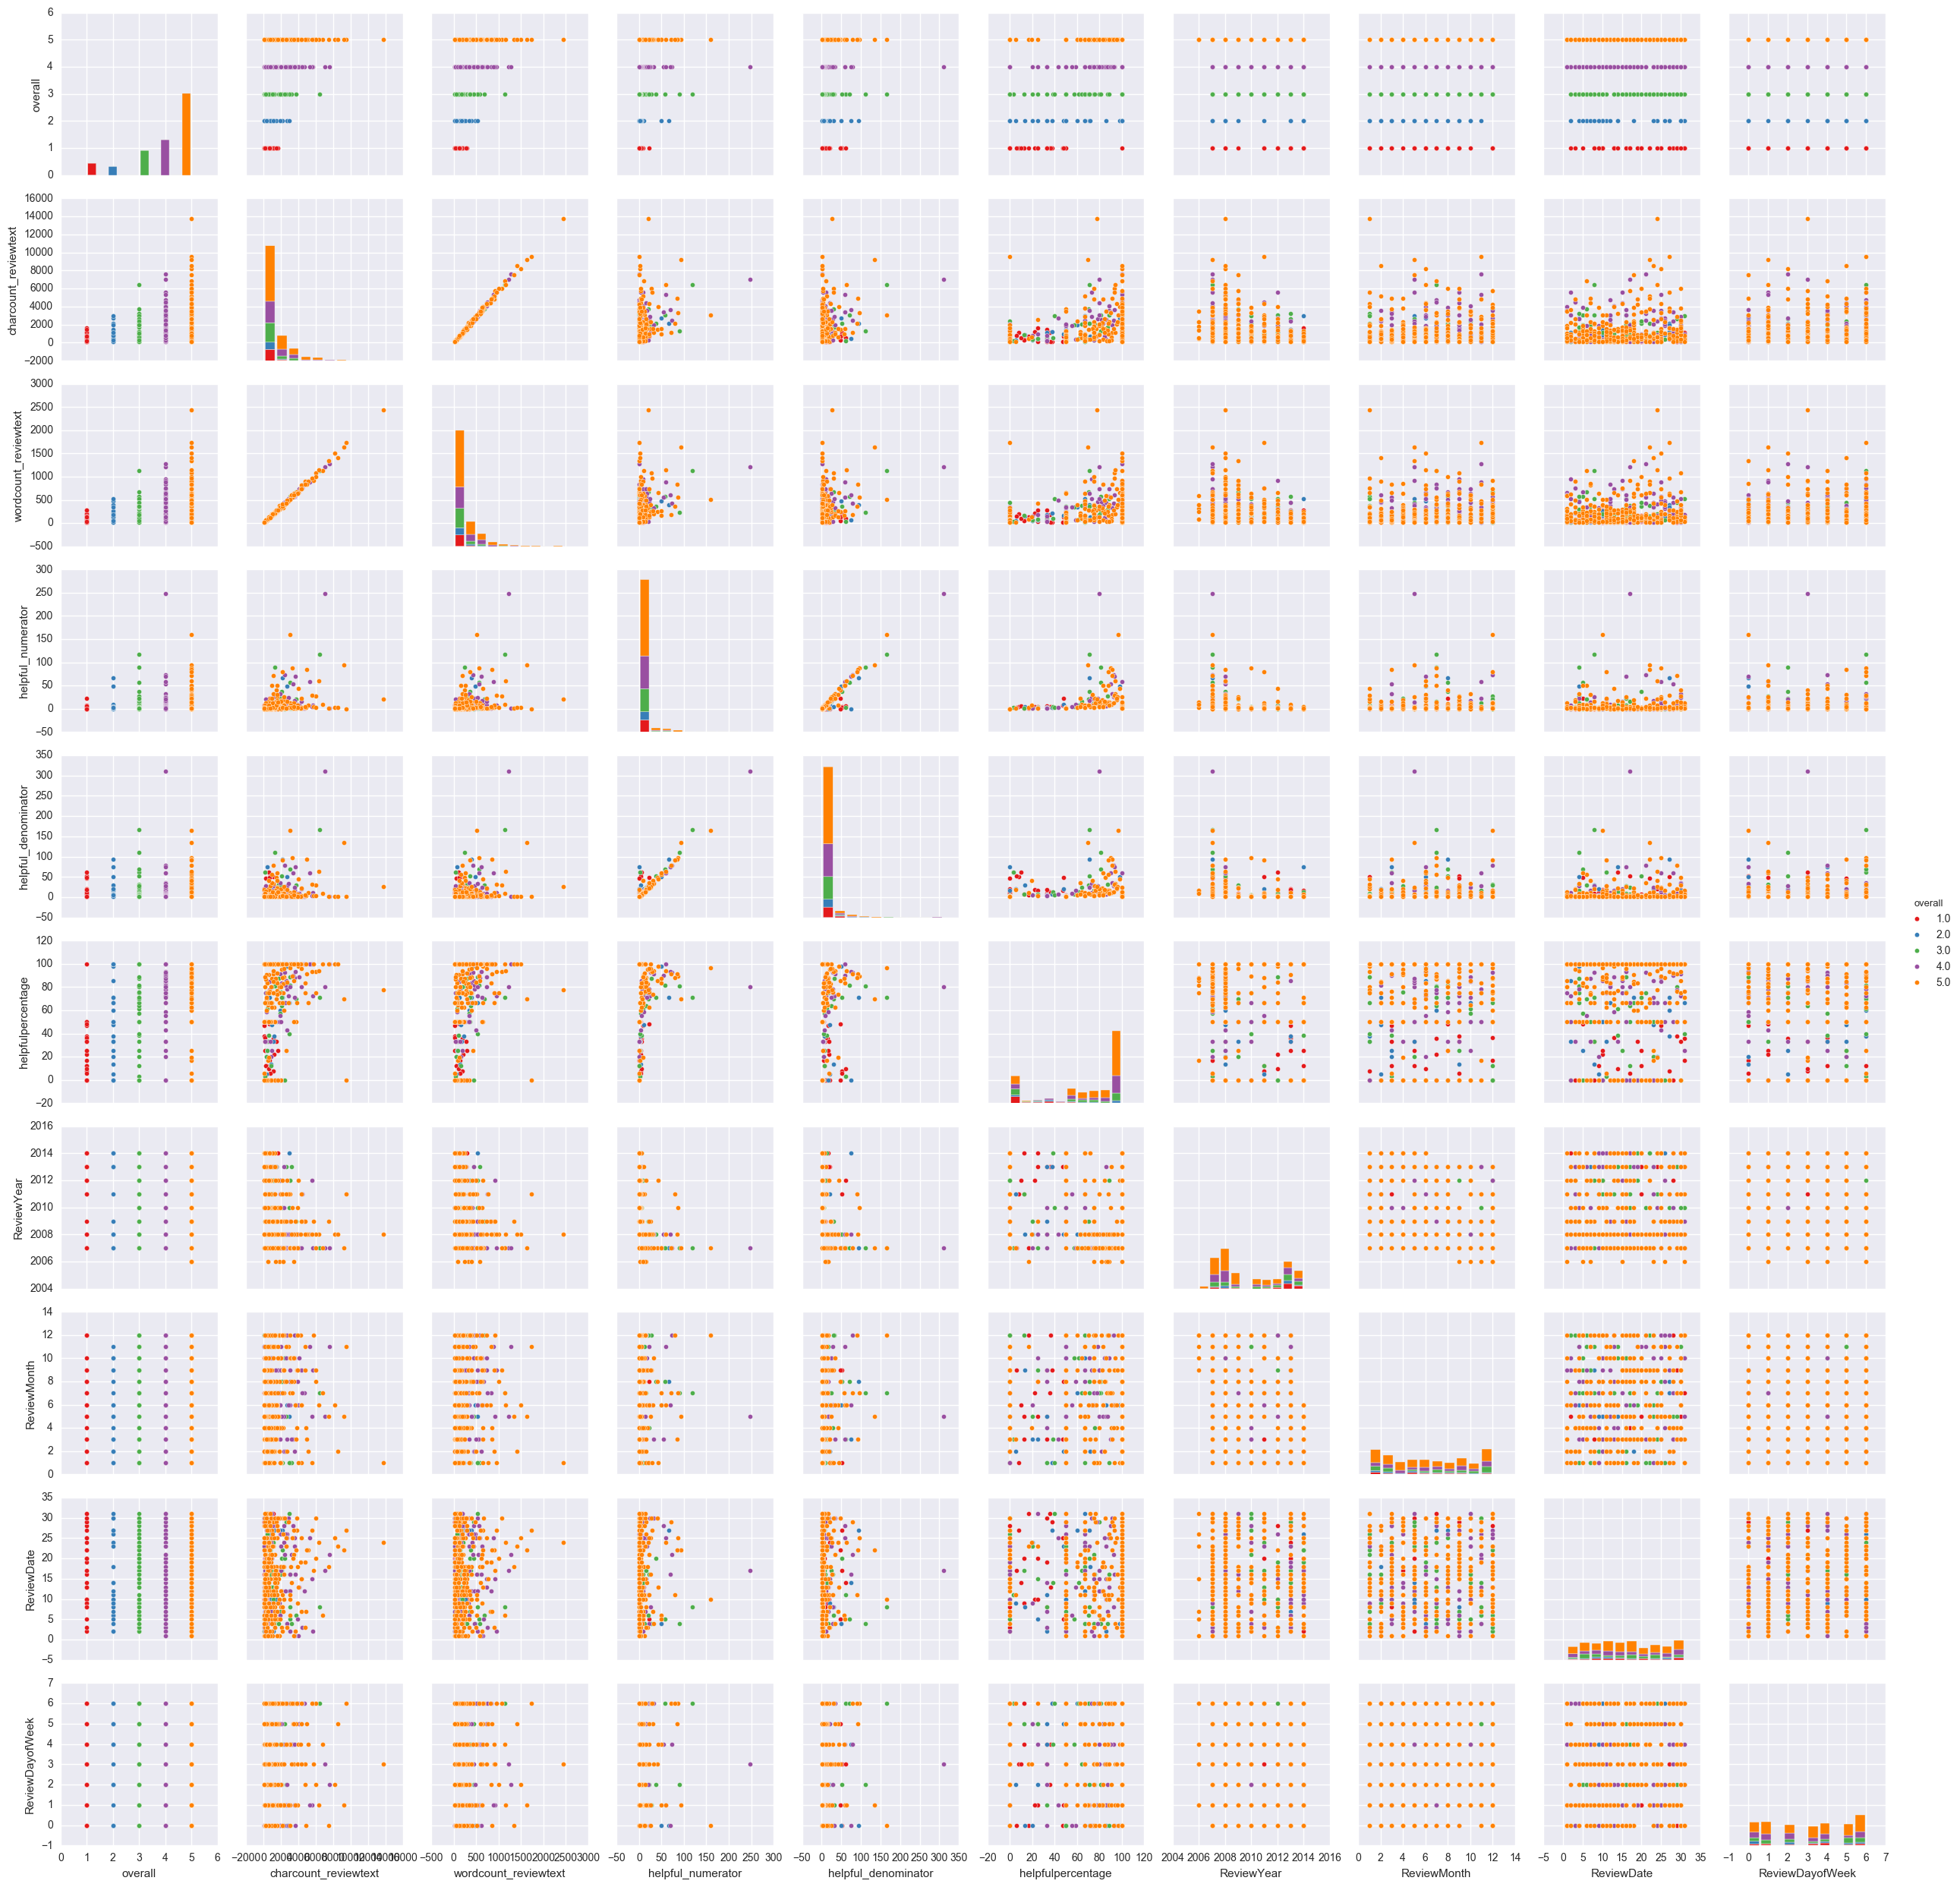

In [69]:
sns.pairplot(score_data.head(500),hue='overall',palette='Set1')

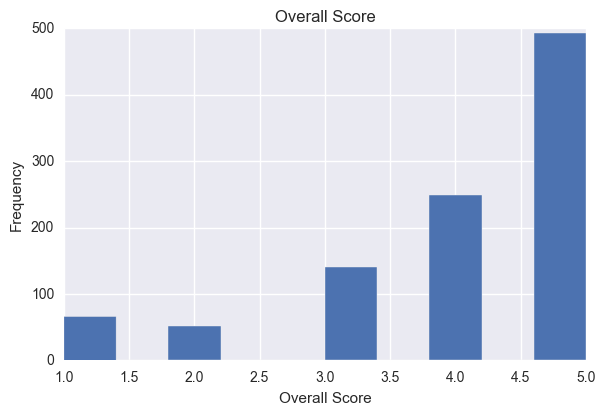

In [79]:
plt.hist(score_data.head(1000)['overall'])
plt.title("Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("Frequency")
plt.show()

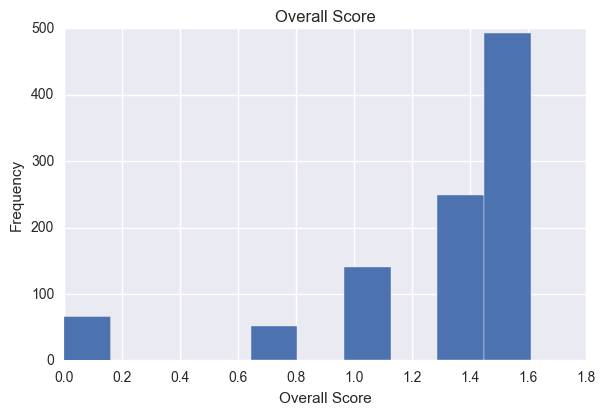

In [89]:
plt.hist(np.log(score_data.head(1000)['overall']))
plt.title("Overall Score")
plt.xlabel("Overall Score")
plt.ylabel("Frequency")
plt.show()

# End of Data Visualization Section on Entire DataSet

# Start of Data Classification Section on Entire DataSet - KNN Clustering Model

In [91]:
# Import KNeighborsClassifier,train_test_split from sklearn.neighbors and sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split


# Create arrays for the features and the response variable
y = score_data['overall'].values
X = score_data.drop('overall',axis=1).values


# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


# # Create a k-NN classifier with 6 neighbors: knn
# knn = KNeighborsClassifier(n_neighbors=6)

# # Fit the classifier to the data
# knn.fit(X,y)

# # Predict the labels for the training data X
# y_pred = knn.predict(X)

# # Predict and print the label for the new data point X_new
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))

0.37169159954


######Checking Accuracy of the model and choosing the best hyperparameter(k in KNN)

In [97]:
# Import KNeighborsClassifier,train_test_split from sklearn.neighbors and sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split


# Create arrays for the features and the response variable
y = score_data['overall'].values
X = score_data.drop('overall',axis=1).values


# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=300)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.416954353663


In [99]:
# Import KNeighborsClassifier,train_test_split from sklearn.neighbors and sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split


# Create arrays for the features and the response variable
y = score_data['overall'].values
X = score_data.drop('overall',axis=1).values


# Split into training and test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=19)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.414652857691


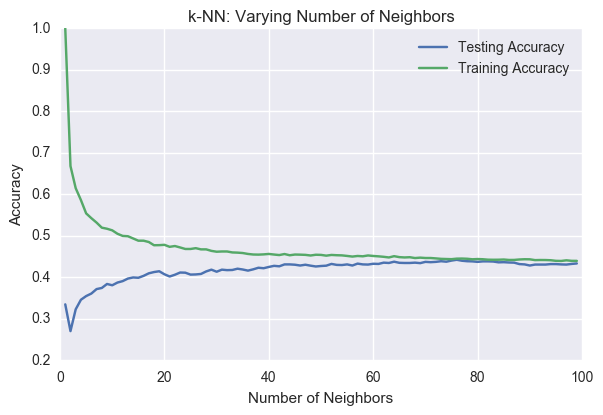

In [98]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

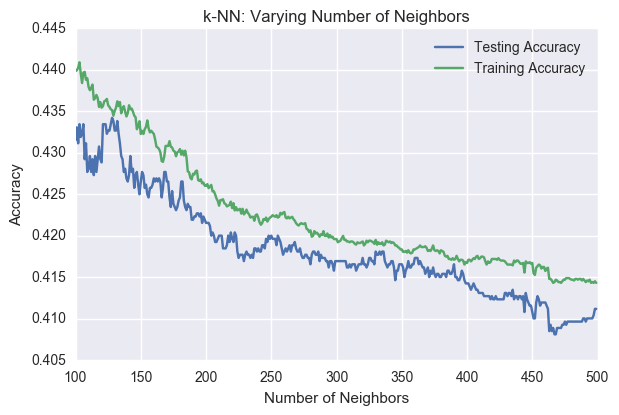

In [96]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(100, 500)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# End of Data Classification Section on Entire DataSet

# Start of Applying Linear Regression Model Section on Entire DataSet

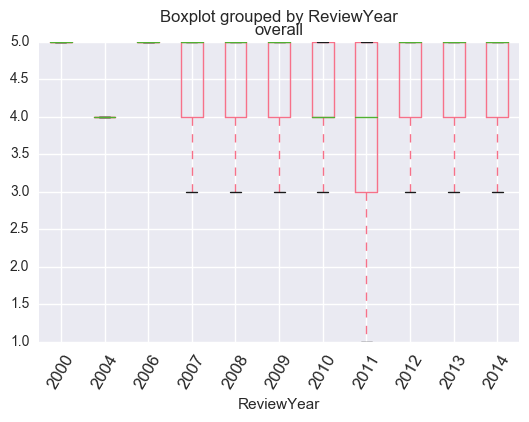

In [131]:
# Import pandas
#import pandas as pd

# Create a boxplot of life expectancy per region
df_AzReviews[0].boxplot('overall', 'ReviewYear', rot=60)

# Show the plot
plt.show()

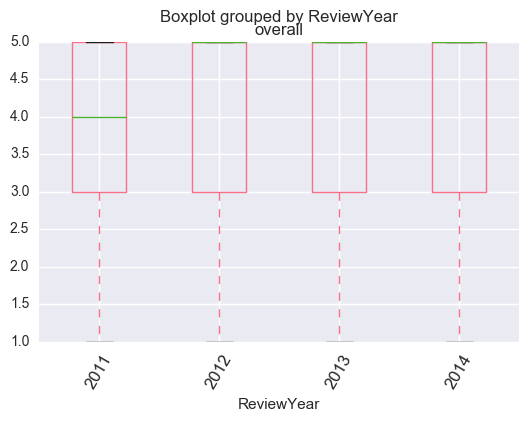

In [132]:

# Create a boxplot of life expectancy per region
df_AzReviews[1].boxplot('overall', 'ReviewYear', rot=60)

# Show the plot
plt.show()

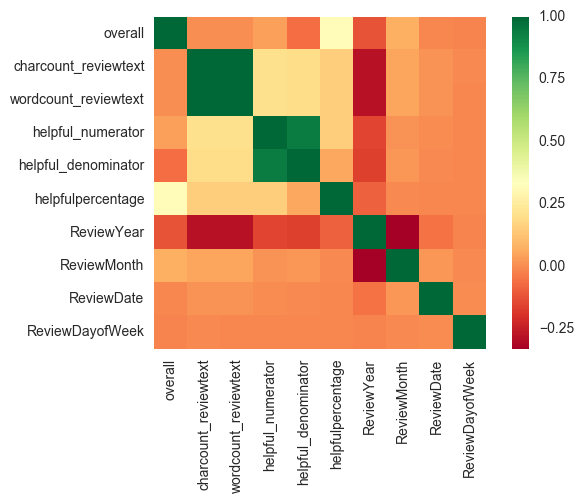

In [128]:
sns.heatmap(score_data.corr(), square=True, cmap='RdYlGn')

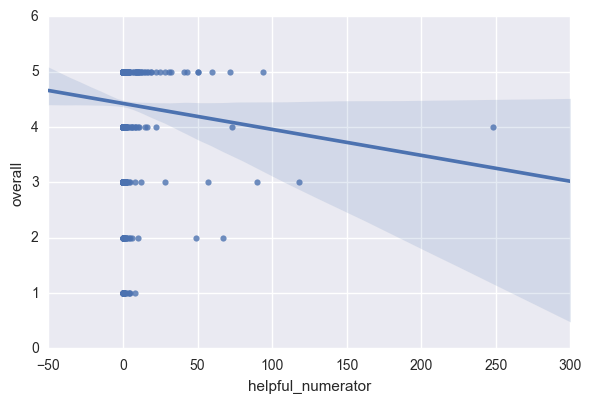

In [81]:
sns.regplot(y="overall", x="helpful_numerator", data=df_AzReviews[0].head(1000), fit_reg = True)

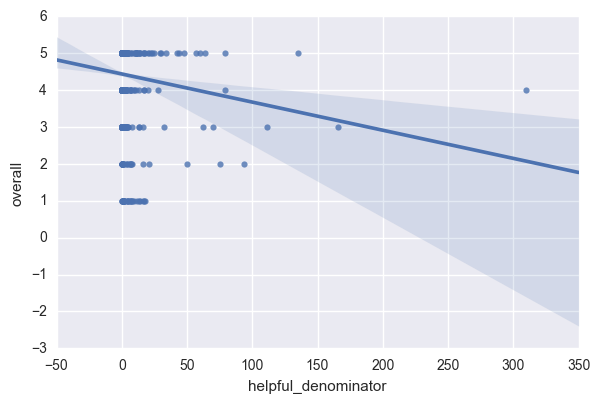

In [82]:
sns.regplot(y="overall", x="helpful_denominator", data=df_AzReviews[0].head(1000), fit_reg = True)

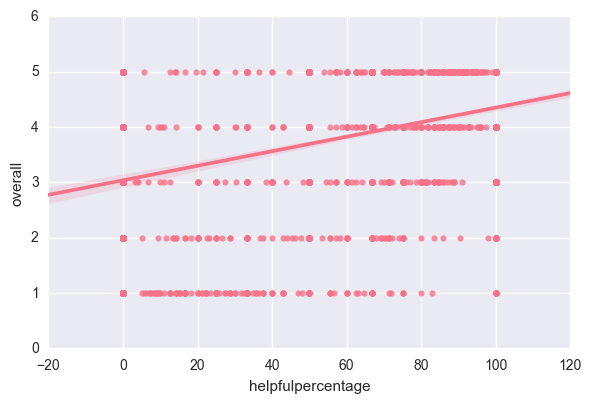

In [129]:
#Helpfulpercentage seems to be the most correlated to overall in the heatmap above
sns.regplot(y="overall", x="helpfulpercentage", data=df_AzReviews[0].head(7000), fit_reg = True)

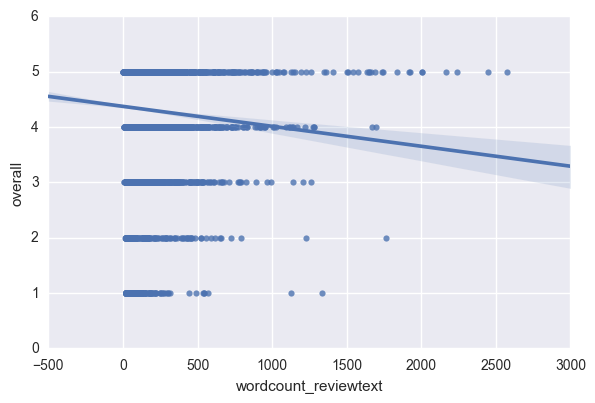

In [85]:
sns.regplot(y="overall", x="wordcount_reviewtext", data=df_AzReviews[0].head(7000), fit_reg = True)

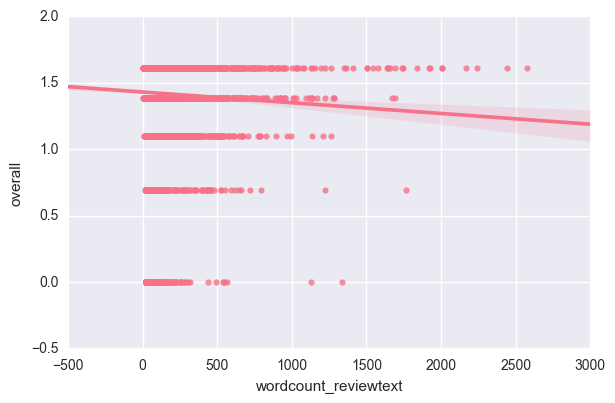

In [127]:
sns.regplot(y=np.log(df_AzReviews[0].head(7000)["overall"]), x="wordcount_reviewtext", data=df_AzReviews[0].head(7000), fit_reg = True)

# End of Applying Linear Regression Model Section on Entire DataSet

# NLTK and NLP Processing of ReviewText data

In [ ]:
# wordcloud
%matplotlib inline 

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

data = open("sfgate.html",'r').read()
text = nltk.clean_html(data)
cleaned = nltk.word_tokenize(text.lower())
wordlist = [x for x in cleaned if (len(x)>=2 and x.isalpha())]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(" ".join(wordlist))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import rpy2.interactive.packages as p
import seaborn as sns
%matplotlib inline

In [ ]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
ro.numpy2ri.activate() 
R = ro.r
%matplotlib inline
#R.heatmap(uniform_data.iloc[:,[0,1]])


data = np.random.random((10, 10))
# #R.png(file='/tmp/out.png')
R.heatmap(data)
#R.heatmap(np.array((merged_df_AA5_head['overall']).astype(int),(merged_df_AA5_head['overall']).astype(int)))
# R("dev.off()")

In [ ]:
# ## load the R package ISLR
# infert = p.importr("ISLR")

# # load the Auto dataset
# auto_df = com.load_data('merged_df_AA5_head')

# # calculate the correlation matrix
# corr = auto_df.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

In [5]:
# Import necessary modules
import nltk

In [6]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize

In [7]:
df_AA5_head['reviewText'][0]

NameError: name 'df_AA5_head' is not defined

In [ ]:
#import nltk
#nltk.download()

In [ ]:
test = merged_df_AA5_head['reviewText']
test

In [ ]:
merged_df_AA5_head.loc[:,['reviewText']]

In [ ]:
for index, row in merged_df_AA5_head.iterrows():
    print(row['reviewText'])

In [ ]:
allReviewText = ' '
for index, row in merged_df_AA5_head.iterrows():
#    print(type(row['reviewText']))
    if pd.notnull(row['reviewText']):
        allReviewText = allReviewText + row['reviewText']
print(allReviewText)

In [ ]:
# Split merged_df_AA5_head into sentences: sentences
#sentences = sent_tokenize(merged_df_AA5_head['reviewText'][0])

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
#tokenized_sent = word_tokenize(sentences[0])

# Make a set of unique tokens in the entire scene: unique_tokens
#unique_tokens = set(word_tokenize(merged_df_AA5_head['reviewText'][0]))
unique_tokens = set(word_tokenize(allReviewText))

# Print the unique tokens result
print(unique_tokens) 

In [ ]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
#In Python, searching a set is much faster than searching a list, 
# so convert the stop words to a set
stopword_list = set(stopwords.words("english"))

In [ ]:
unique_tokens

In [ ]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in unique_tokens if t.isalpha()]
alpha_only

In [ ]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopword_list]
no_stops

In [ ]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
lemmatized

In [ ]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)
bow

In [ ]:
# Print the 10 most common tokens
print(bow.most_common(10))

In [ ]:
import spacy

In [ ]:
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [ ]:
from spacy.lang.en import English

In [ ]:
# Instantiate the English model: nlp
#python -m spacy download en
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)


In [ ]:
# Create a new document: doc
#doc = nlp(merged_df_AA5_head['reviewText'][0])
doc = nlp(allReviewText)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

In [ ]:
doc = nlp(allReviewText)
# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)
token_data = [(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop) for token in doc]
#token_data

tokendf = pd.DataFrame(token_data)
tokendf.columns = ['TEXT','LEMMA','POS','TAG','DEP','SHAPE','IS_ALPHA','IS_STOP']
tokendf

In [ ]:
#CTRL + / for commenting/uncommenting lines
# def normalize_corpus(corpus):
#     normalized_corpus = []    
#     for text in corpus:
#         text = text.lower()
#         text = expand_contractions(text)
#         text = remove_characters(text)
#         tokens = tokenize_text(text)
#         tokens = remove_stopwords(tokens)
#         tokens = remove_repeated_characters(tokens)
#         tokens = correct(tokens)
#         tokens = Lemmatize_tokens(tokens)
#         text = ' '.join(tokens)
#         normalized_corpus.append(text)
                    
#     return normalized_corpus

In [ ]:
nc = normalize_corpus(allReviewText)
nc

In [ ]:
# sns.style = sns.set()

# _ = plt.hist(versicolor_petal_length)

# plt.show()


##############################################################################################################################

###### Working with entire dataset now

In [ ]:
 df_RT_AA5.columns = [' reviewerID','asin','overall','unixReviewTime']

In [ ]:
df_RT_AA5.shape

In [ ]:
merged_df_AA5_wholeinner = pd.merge(df_AA5, df_RT_AA5, how='inner')

In [ ]:
merged_df_AA5_wholeinner.shape

In [ ]:
print(merged_df_AA5_wholeinner.head())

In [ ]:
merged_df_AA5_wholeouter = pd.merge(df_AA5, df_RT_AA5, how='outer')
merged_df_AA5_wholeouter.shape
print(merged_df_AA5_wholeouter.head())

In [ ]:
merged_df_AA5_wholeouter.shape

In [ ]:
merged_df_AA5_wholeouter.isnull().values.any()

In [ ]:
merged_df_AA5_wholeouter.isnull().values.count

In [ ]:
merged_df_AA5_wholeouter.describe

In [ ]:
merged_df_AA5_wholeouter.isnull().sum().sum()

In [ ]:
%pylab

In [ ]:
%pylab inline

In [ ]:
plot


In [ ]:
plt.plot(merged_df_AA5_wholeouter['overall'])

In [ ]:
plt.hist(merged_df_AA5_wholeouter['overall'])
plt.show

In [ ]:
merged_df_AA5_wholeouter['overall'].value_counts()

In [ ]:
fig = plt.figure()

In [ ]:
ax = fig.add.subplot(111)

In [ ]:
ax = fig.add_subplot(111)

In [ ]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(np.linspace(-1, 1, 10974305), merged_df_AA5_wholeouter['overall'],color = 'darkgreen', marker='^')

In [ ]:
import numpy as np

sus1 = (merged_df_AA5_wholeouter['helpful'].str[1] != 0.0) & (merged_df_AA5_wholeouter['helpful'].dropna()) 
# Create a DataFrame with the suspicious row: susmerged_df_AA5['helpful'].str[1] != 0.0pect
suspect = merged_df_AA5_wholeouter.loc[sus1]
#print(suspect['helpful'])
#print(suspect)
merged_df_AA5_wholeouter['helpfulpercentage'] = (np.divide(suspect['helpful'].str[0],suspect['helpful'].str[1])* 100).astype(np.int64)
merged_df_AA5_wholeouter['helpful_numerator'] = suspect['helpful'].str[0].astype(np.int64)
merged_df_AA5_wholeouter['helpful_denominator'] = suspect['helpful'].str[1].astype(np.int64)

def calculate_charlen(row):
    return len(row['reviewText'])
sus = (merged_df_AA5_wholeouter['reviewText'].notnull())
# Create a DataFrame with the suspicious row: susmerged_df_AA5['helpful'].str[1] != 0.0pect
suspect = merged_df_AA5_wholeouter[sus]
merged_df_AA5_wholeouter['charCount_reviewText'] = suspect.apply(calculate_charlen,axis=1)
#merged_df_AA5_wholeouter       

def calculate_wordcount(row):
    return len(row['reviewText'].split())
sus1 = (merged_df_AA5_wholeouter['reviewText'].notnull())
# Create a DataFrame with the suspicious row: susmerged_df_AA5['helpful'].str[1] != 0.0pect
suspect1 = merged_df_AA5_wholeouter[sus1]
merged_df_AA5_wholeouter['wordCount_reviewText'] = suspect1.apply(calculate_charlen,axis=1)
merged_df_AA5_wholeouter 
#print(merged_df_AA5_wholeouter.dropna())

fig, ax = plt.subplots()
ax.scatter(merged_df_AA5_wholeouter.dropna()['wordCount_reviewText'],merged_df_AA5_wholeouter.dropna()['overall'],color = 'darkgreen', marker='^')
plt.title("Word Count vs Overall Score")
plt.xlabel("Word Count")
plt.ylabel("Overall Score")
plt.show

fig, ax = plt.subplots()
ax.scatter(merged_df_AA5_wholeouter.dropna()['charCount_reviewText'],merged_df_AA5_wholeouter.dropna()['overall'],color = 'darkgreen', marker='^')
plt.title("Character Count vs Overall Score")
plt.xlabel("Character Count")
plt.ylabel("Overall Score")
plt.show

fig, ax = plt.subplots()
ax.scatter(merged_df_AA5_wholeouter.dropna()['helpful_denominator'],merged_df_AA5_wholeouter.dropna()['overall'],color = 'darkgreen', marker='^')
plt.title("Helpfull Total Reviews vs Overall Score")
plt.xlabel("Helpful Total Reviews")
plt.ylabel("Overall Score")
plt.show

In [ ]:
plt.hist(merged_df_AA5_wholeouter['overall',])
plt.show

In [ ]:
merged_df_AA5_wholeouter 

In [ ]:
print(merged_df_AA5_wholeouter['overall'][0])
print(merged_df_AA5_wholeouter['reviewText'][0])

In [ ]:
import numpy as np

sus1 = (merged_df_AA5_wholeouter['helpful'].str[1] != 0.0) & (merged_df_AA5_wholeouter['helpful'].dropna()) & (merged_df_AA5_wholeouter['helpful'].str[1] > 2000)
# Create a DataFrame with the suspicious row: susmerged_df_AA5['helpful'].str[1] != 0.0pect
suspect = merged_df_AA5_wholeouter.loc[sus1]
#print(suspect['helpful'])
#print(suspect)
merged_df_AA5_wholeouter['helpfulpercentage'] = (divide(suspect['helpful'].str[0],suspect['helpful'].str[1])* 100).astype(int64)
merged_df_AA5_wholeouter['helpful_numerator'] = suspect['helpful'].str[0].astype(int64)
merged_df_AA5_wholeouter['helpful_denominator'] = suspect['helpful'].str[1].astype(int64)
#print(merged_df_AA5_wholeouter.dropna())
plt.plot(merged_df_AA5_wholeouter.dropna()['helpful_denominator'],merged_df_AA5_wholeouter.dropna()['overall'])

fig, ax = plt.subplots()
ax.scatter(merged_df_AA5_wholeouter.dropna()['helpful_denominator'],merged_df_AA5_wholeouter.dropna()['overall'],color = 'darkgreen', marker='^')

#x = np.arange(10)
#fig, ax = plt.subplots()
#ax.stackplot(x, merged_df_AA5_wholeouter.dropna()['helpfulpercentage'])
#ax.set_title('100 % stacked area chart')
#ax.set_ylabel('Percent (%)')
#ax.margins(0, 0) # Set margins to avoid "whitespace"

plt.show()

In [ ]:
import numpy as np
fig, ax = plt.subplots()
ax.scatter(np.linspace(-1, 1, 10974305), merged_df_AA5_wholeouter['overall'],color = 'darkgreen', marker='^')

In [ ]:
plt.show

In [ ]:
import numpy as np
fig, ax = plt.subplots()
ax = merged_df_AA5_wholeouter['overall'].plot(kind='area', stacked=True, title='100 % stacked area chart')
plt.show

In [ ]:
merged_df_AA5_wholeouter.columns

In [ ]:
merged_df_AA5_wholeouter.groupby(['reviewerID','asin'])['overall'].mean()

In [ ]:
merged_df_AA5_wholeouter.groupby('asin')['overall'].mean()

In [ ]:
df_meta_AA5_wholeouter = merged_df_AA5_wholeouter.groupby('reviewerID')['overall'].mean()

In [ ]:
df_meta_AA5_wholeouter.describe